In [1]:
import numpy as np
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Dropout
from keras.regularizers import l2
import matplotlib.pyplot as plt
import pandas as pd




Using TensorFlow backend.


In [2]:
datafile = "mix6ml"

x_data = pd.read_csv(datafile+"X.csv",names=['s1','s2','s3','s4','s5'])
y_dataR = np.genfromtxt(datafile+"Y.csv",delimiter=',',dtype=int)
num_classes = np.max(y_dataR) + 1
y_data = keras.utils.to_categorical(y_dataR, num_classes)
#x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.20, random_state=0)
x_train = x_data[:880]
x_test = x_data[880:]
y_train = y_data[:880]
y_test = y_data[880:]
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((880, 5), (880, 6), (845, 5), (845, 6))

In [3]:
#defifne a sequentail Model
model = Sequential()
#Hidden Layer-1
model.add(Dense(100,activation='relu',input_dim=5,kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3, noise_shape=None, seed=None))

#Hidden Layer-2
model.add(Dense(100,activation = 'relu',kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3, noise_shape=None, seed=None))

#Output layer
model.add(Dense(6,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_output = model.fit(x_train,y_train,epochs=150,batch_size=20,verbose=1,validation_data=(x_test,y_test),)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 880 samples, validate on 845 samples
Epoch 1/150
880/880 [==============================] - 0s 417us/step - loss: 15.4919 - accuracy: 0.7394 - val_loss: 3.3432 - val_accuracy: 0.8187
Epoch 2/150
880/880 [==============================] - 0s 160us/step - loss: 6.2435 - accuracy: 0.7761 - val_loss: 1.3458 - val_accuracy: 0.8452
Epoch 3/150
880/880 [==============================] - 0s 151us/step - loss: 3.0500 - accuracy: 0.7729 - val_loss: 0.9950 - val_accuracy: 0.8018
Epoch 4/150
880/880 [==============================] - 0s 155us/step - loss: 1.7846 - accuracy: 0.7655 - val_loss: 0.9946 - val_accuracy: 0.7414
Epoch 5/150
880/880 [==============================] - 0s 151us/step - loss: 1.2592 - accuracy: 0.7682 - val_loss: 0.9790 - val_accuracy: 0.8385
Epoch 6/150
880/880 [==============================] - 0s 150us/step - loss: 1.0837 - accuracy: 0.8114 - val_loss: 0.9698 - val_accur

880/880 [==============================] - 0s 190us/step - loss: 0.3180 - accuracy: 0.9553 - val_loss: 0.3372 - val_accuracy: 0.9564
Epoch 54/150
880/880 [==============================] - 0s 176us/step - loss: 0.3137 - accuracy: 0.9563 - val_loss: 0.3346 - val_accuracy: 0.9560
Epoch 55/150
880/880 [==============================] - 0s 172us/step - loss: 0.3146 - accuracy: 0.9519 - val_loss: 0.3333 - val_accuracy: 0.9383
Epoch 56/150
880/880 [==============================] - 0s 141us/step - loss: 0.3274 - accuracy: 0.9388 - val_loss: 0.3597 - val_accuracy: 0.9176
Epoch 57/150
880/880 [==============================] - 0s 145us/step - loss: 0.3503 - accuracy: 0.9303 - val_loss: 0.3314 - val_accuracy: 0.9511
Epoch 58/150
880/880 [==============================] - 0s 151us/step - loss: 0.3196 - accuracy: 0.9441 - val_loss: 0.3217 - val_accuracy: 0.9499
Epoch 59/150
880/880 [==============================] - 0s 285us/step - loss: 0.3088 - accuracy: 0.9468 - val_loss: 0.3196 - val_accuracy

880/880 [==============================] - 0s 127us/step - loss: 0.1789 - accuracy: 0.9540 - val_loss: 0.2281 - val_accuracy: 0.9339
Epoch 110/150
880/880 [==============================] - 0s 123us/step - loss: 0.1777 - accuracy: 0.9536 - val_loss: 0.1953 - val_accuracy: 0.9576
Epoch 111/150
880/880 [==============================] - 0s 144us/step - loss: 0.1702 - accuracy: 0.9555 - val_loss: 0.2142 - val_accuracy: 0.9432
Epoch 112/150
880/880 [==============================] - 0s 247us/step - loss: 0.1834 - accuracy: 0.9494 - val_loss: 0.2193 - val_accuracy: 0.9448
Epoch 113/150
880/880 [==============================] - 0s 187us/step - loss: 0.1893 - accuracy: 0.9481 - val_loss: 0.2204 - val_accuracy: 0.9314
Epoch 114/150
880/880 [==============================] - 0s 192us/step - loss: 0.1736 - accuracy: 0.9528 - val_loss: 0.1982 - val_accuracy: 0.9438
Epoch 115/150
880/880 [==============================] - 0s 146us/step - loss: 0.1679 - accuracy: 0.9576 - val_loss: 0.1847 - val_ac

In [4]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               600       
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 606       
Total params: 11,306
Trainable params: 11,306
Non-trainable params: 0
_________________________________________________________________


In [9]:
print('Training Accuracy : ' , np.mean(model_output.history["accuracy"]))
print('Validation Accuracy : ' , np.mean(model_output.history["val_accuracy"]))
y_pred = model.predict(x_test)
rounded = [np.argmax(x) for x in y_pred]
y_testComp = [np.argmax(x) for x in y_test]
confusion_matrix(y_testComp,rounded)

Training Accuracy :  0.93329924
Validation Accuracy :  0.9365417762597402


array([[256,   0,   0,   8,   0],
       [  0, 122,   0,   0,   0],
       [  0,   0, 183,   0,   2],
       [  0,   0,   0, 163,   1],
       [ 39,  16,   8,  35,  12]])

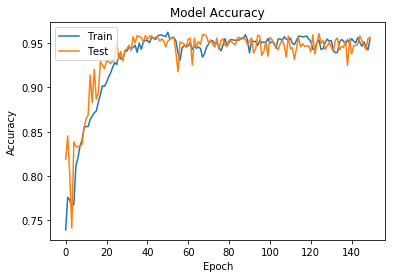

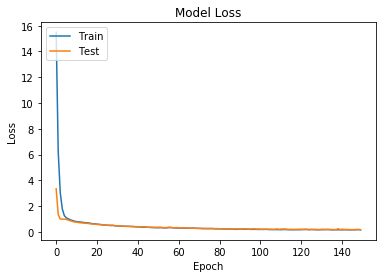

In [10]:
# Plot training & validation accuracy values
plt.plot(model_output.history['accuracy'])
plt.plot(model_output.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model_output.history['loss'])
plt.plot(model_output.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [11]:
precision_score(y_testComp,rounded,average=None)

array([0.86779661, 0.88405797, 0.95811518, 0.79126214, 0.8       ])

In [13]:
testfile = "mix6ml"
new_dataX = pd.read_csv(testfile+"X.csv",names=['s1','s2','s3','s4','s5'])
new_dataYR = np.genfromtxt(testfile+"Y.csv",delimiter=',',dtype=int)
new_dataY = keras.utils.to_categorical(new_dataYR, num_classes)
new_dataX.shape,new_dataY.shape
new_predYT = model.predict(new_dataX)
new_predY = [np.argmax(x) for x in new_predYT]
new_predYComp = [np.argmax(x) for x in new_dataY]
confusion_matrix(new_predYComp,new_predY)

array([[648,   0,   0,   9,   0],
       [  0, 214,   0,   0,   0],
       [  0,   0, 347,   0,   2],
       [  0,   0,   0, 307,   1],
       [ 56,  24,  26,  66,  25]])

In [14]:
datafile = "mix6ml"

test = np.genfromtxt(datafile+"X.csv",delimiter=',')
y_dataR = np.genfromtxt(datafile+"Y.csv",delimiter=',',dtype=int)
num_classes = np.max(y_dataR) + 1
y_data = keras.utils.to_categorical(y_dataR, num_classes)
x_trainT = test[:1000]
x_testT = test[1000:]
y_trainT = y_data[:1000]
y_testT = y_data[1000:]
x_trainT.shape,y_trainT.shape,x_testT.shape,y_testT.shape, test.shape, y_data.shape



((1000, 5), (1000, 6), (725, 5), (725, 6), (1725, 5), (1725, 6))

In [15]:
x_data.shape

(1725, 5)

In [16]:
x_data = test.reshape(test.shape[0],1,5)
x_train = x_trainT.reshape(x_trainT.shape[0],1,5)
x_test = x_testT.reshape(x_testT.shape[0],1,5)
y_train = y_trainT.reshape(y_trainT.shape[0],1,6)
y_test = y_testT.reshape(y_testT.shape[0],1,6)
x_train.shape,y_train.shape,x_test.shape,y_test.shape, test.shape, y_data.shape


((1000, 1, 5), (1000, 1, 6), (725, 1, 5), (725, 1, 6), (1725, 5), (1725, 6))

In [17]:
x_data.shape

(1725, 1, 5)

In [18]:
samples = list()
length = 115
for i in range(0,x_data.shape[0],length):
	# grab from i to i + 200
	sample = x_data[i:i+length]
	samples.append(sample)
print(len(samples))

15


In [19]:
#Hidden Layer-1
model = Sequential()
model.add(LSTM(128, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(6, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_output = model.fit(x_train, y_trainT, epochs=50, batch_size=72, validation_data=(x_test, y_testT), verbose=2, shuffle=False)

Train on 1000 samples, validate on 725 samples
Epoch 1/50
 - 0s - loss: 0.6832 - accuracy: 0.5817 - val_loss: 0.6069 - val_accuracy: 0.6179
Epoch 2/50
 - 0s - loss: 0.5796 - accuracy: 0.6988 - val_loss: 0.5483 - val_accuracy: 0.7880
Epoch 3/50
 - 0s - loss: 0.5181 - accuracy: 0.7943 - val_loss: 0.4952 - val_accuracy: 0.7880
Epoch 4/50
 - 0s - loss: 0.4761 - accuracy: 0.8172 - val_loss: 0.4670 - val_accuracy: 0.7936
Epoch 5/50
 - 0s - loss: 0.4461 - accuracy: 0.8330 - val_loss: 0.4384 - val_accuracy: 0.8333
Epoch 6/50
 - 0s - loss: 0.4215 - accuracy: 0.8333 - val_loss: 0.4286 - val_accuracy: 0.8333
Epoch 7/50
 - 0s - loss: 0.4108 - accuracy: 0.8333 - val_loss: 0.4223 - val_accuracy: 0.8333
Epoch 8/50
 - 0s - loss: 0.4033 - accuracy: 0.8333 - val_loss: 0.4182 - val_accuracy: 0.8333
Epoch 9/50
 - 0s - loss: 0.3979 - accuracy: 0.8333 - val_loss: 0.4155 - val_accuracy: 0.8333
Epoch 10/50
 - 0s - loss: 0.3938 - accuracy: 0.8333 - val_loss: 0.4135 - val_accuracy: 0.8333
Epoch 11/50
 - 0s - lo

In [20]:
model.add(LSTM(32, input_shape=(x_data.shape[1], x_data.shape[2])))
model.add(Dense(6, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_output = model.fit(x_data, y_data, epochs=50, batch_size=72, verbose=2, shuffle=False)

ValueError: Input 0 is incompatible with layer lstm_2: expected ndim=3, found ndim=2

In [21]:
plt.plot(model_output.history['acc'])
plt.plot(model_output.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(model_output.history['loss'])
plt.plot(model_output.history['val_loss'])
plt.title('model_output loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

KeyError: 'acc'

In [22]:
new_predYT= model.predict(x_train)
new_predY = [argmax(x) for x in new_predYT]
new_predYComp = [argmax(x) for x in y_train]


NameError: name 'argmax' is not defined

In [ ]:
new_predY

In [ ]:
testfile = "mix6ml"
new_dataX = pd.read_csv(testfile+"X.csv",names=['s1','s2','s3','s4','s5'])
new_dataYR = np.genfromtxt(testfile+"Y.csv",delimiter=',',dtype=int)
new_dataY = keras.utils.to_categorical(new_dataYR, num_classes)
new_dataX.shape,new_dataY.shape
new_predYT = model.predict(new_dataX)
new_predY = [argmax(x) for x in new_predYT]
new_predYComp = [argmax(x) for x in new_dataY]
confusion_matrix(new_predYComp,new_predY)